# What Affects Work Life Balance?

## Data Loading and Preprocessing

A study on >15,000 survey data from AuthenticHappiness.org taken from Kaggle Dataset from 2015 to 2021

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download ydalat/lifestyle-and-wellbeing-data
! unzip lifestyle-and-wellbeing-data

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/294k [00:00<?, ?B/s]
100% 294k/294k [00:00<00:00, 42.9MB/s]
Archive:  lifestyle-and-wellbeing-data.zip
  inflating: Wellbeing_and_lifestyle_data_Kaggle.csv  


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("Wellbeing_and_lifestyle_data_Kaggle.csv", 
                 parse_dates = ["Timestamp"])
df['Year'] = pd.DatetimeIndex(df['Timestamp']).year
df['Month'] = pd.DatetimeIndex(df['Timestamp']).month

df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,Year,Month
0,2015-07-07,3,2,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,36 to 50,Female,609.5,2015,7
1,2015-07-07,2,3,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,36 to 50,Female,655.6,2015,7
2,2015-07-07,2,3,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,36 to 50,Female,631.6,2015,7
3,2015-07-07,3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,51 or more,Female,622.7,2015,7
4,2015-07-07,5,1,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,51 or more,Female,663.9,2015,7


In [4]:
df.dtypes

Timestamp                  datetime64[ns]
FRUITS_VEGGIES                      int64
DAILY_STRESS                       object
PLACES_VISITED                      int64
CORE_CIRCLE                         int64
SUPPORTING_OTHERS                   int64
SOCIAL_NETWORK                      int64
ACHIEVEMENT                         int64
DONATION                            int64
BMI_RANGE                           int64
TODO_COMPLETED                      int64
FLOW                                int64
DAILY_STEPS                         int64
LIVE_VISION                         int64
SLEEP_HOURS                         int64
LOST_VACATION                       int64
DAILY_SHOUTING                      int64
SUFFICIENT_INCOME                   int64
PERSONAL_AWARDS                     int64
TIME_FOR_PASSION                    int64
WEEKLY_MEDITATION                   int64
AGE                                object
GENDER                             object
WORK_LIFE_BALANCE_SCORE           

In [5]:
# convert feature dtypes to integer, replace nan with median
df["DAILY_STRESS"] = pd.to_numeric(df["DAILY_STRESS"], errors='coerce')
df["DAILY_STRESS"].fillna(df["DAILY_STRESS"].median(), inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ccc68a490>,
      dtype=object)

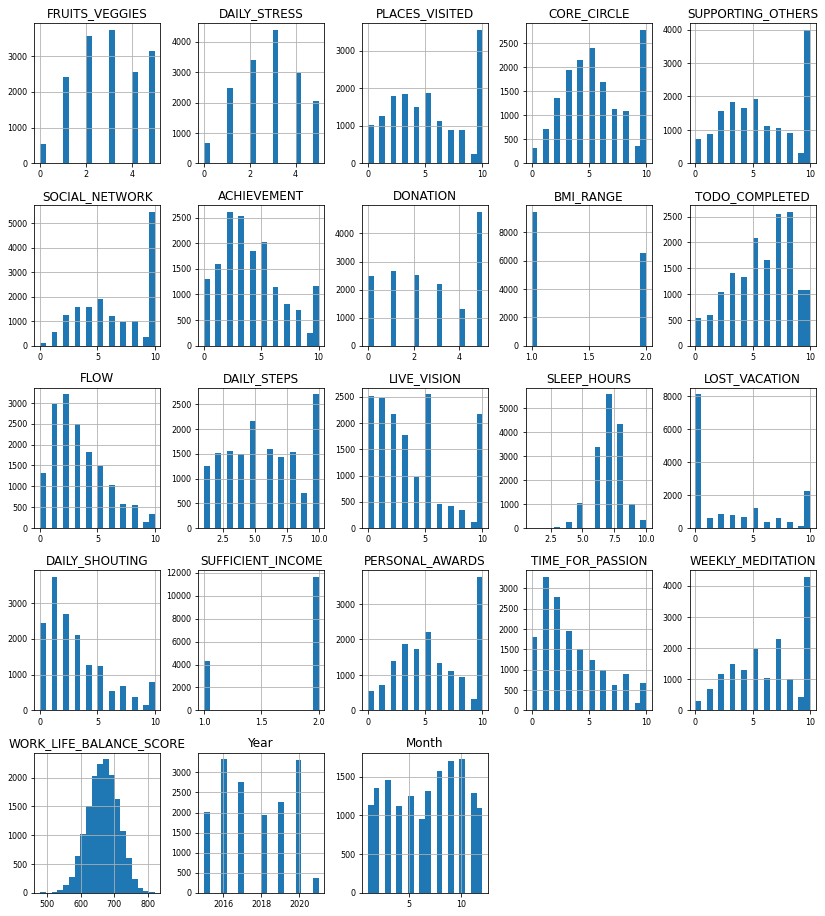

In [6]:
# examine distributions for each int64 features
df.hist(figsize=(14,16), bins = 20, xlabelsize=8, ylabelsize = 8)

In [7]:
# examine distribution categorical features
# feature 1: AGE x GENDER
pd.crosstab(
    df['GENDER'], 
    df['AGE'], 
    rownames=['Gender'], 
    colnames=['Age'],
    margins = True,
    normalize = True
).style.format('{:.2%}')

Age,21 to 35,36 to 50,51 or more,Less than 20,All
Gender,,,,,
Female,22.17%,18.54%,14.34%,6.67%,61.72%
Male,16.07%,10.61%,6.88%,4.72%,38.28%
All,38.24%,29.14%,21.22%,11.39%,100.00%


In [8]:
# examine distribution categorical features
# feature 2: MONTH x YEAR
pd.crosstab(
    df['Month'], 
    df['Year'], 
    rownames=['Month'], 
    colnames=['Year'],
    margins = True,
    normalize = True
).style.format('{:.2%}')

Year,2015,2016,2017,2018,2019,2020,2021,All
Month,,,,,,,,
1,0.00%,1.92%,1.77%,0.58%,1.09%,1.19%,0.57%,7.12%
2,0.00%,1.87%,2.09%,0.73%,1.28%,1.85%,0.67%,8.49%
3,0.00%,3.44%,1.76%,0.37%,0.86%,1.62%,1.08%,9.13%
4,0.00%,2.27%,1.46%,0.55%,0.95%,1.77%,0.00%,6.99%
5,0.00%,1.77%,1.27%,1.53%,1.37%,1.85%,0.00%,7.79%
6,0.00%,1.12%,1.14%,1.17%,0.85%,1.66%,0.00%,5.94%
7,1.37%,1.01%,1.07%,2.29%,1.14%,1.36%,0.00%,8.25%
8,2.36%,1.19%,1.06%,2.12%,1.85%,1.31%,0.00%,9.89%
9,2.42%,1.52%,1.24%,1.23%,1.26%,3.02%,0.00%,10.69%


In [9]:
# examine distribution categorical features
# feature 3: BMI_RANGE x GENDER

pd.crosstab(
    df['BMI_RANGE'], 
    df['GENDER'], 
    rownames=['BMI Range'], 
    colnames=['GENDER'],
    margins = True,
    normalize = True
).style.format('{:.2%}')

GENDER,Female,Male,All
BMI Range,,,
1,36.12%,22.81%,58.93%
2,25.60%,15.46%,41.07%
All,61.72%,38.28%,100.00%


In [10]:
# examine distribution categorical features
# feature 4: SUFFICIENT_INCOME x GENDER
pd.crosstab(
    df['SUFFICIENT_INCOME'], 
    df['GENDER'], 
    rownames=['Sufficient Income'], 
    colnames=['GENDER'],
    margins = True,
    normalize = True
).style.format('{:.2%}')

GENDER,Female,Male,All
Sufficient Income,,,
1,16.95%,10.15%,27.10%
2,44.77%,28.13%,72.90%
All,61.72%,38.28%,100.00%


Feature Transformation: Dummy Variable & Skewness Transform

In [11]:
# dummy variables
df['BMI_RANGE'].replace({1: "BMI < 25", 2: "BMI >= 25"}, inplace = True)
df['SUFFICIENT_INCOME'].replace({1: "INCOME INSUFFICIENT", 2: "INCOME SUFFICIENT"}, inplace = True)
df['AGE'].replace(
    {'Less than 20': '0. Less than 20', 
     '21 to 35': '1. 21 to 35',
     '36 to 50': '2. 36 to 50', 
     '51 or more': '3. 51 or more',
    }, inplace = True
    )

transformed = {}
list_transformed = ["GENDER", "AGE", "BMI_RANGE","SUFFICIENT_INCOME"]
for _i in list_transformed:
  transformed[_i] = pd.get_dummies(df[_i], drop_first = True)
transformed.keys()

dict_keys(['GENDER', 'AGE', 'BMI_RANGE', 'SUFFICIENT_INCOME'])

In [12]:
transformed["AGE"]

,1. 21 to 35,2. 36 to 50,3. 51 or more
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
15967,0,0,1
15968,1,0,0
15969,1,0,0
15970,1,0,0


In [13]:
coded_df = pd.concat(
                      [df.drop(["GENDER", "AGE", "BMI_RANGE","SUFFICIENT_INCOME", "Timestamp", "Month","Year"],axis=1), 
                       pd.concat([transformed[_i] for _i in list_transformed], axis = 1)], 
                     axis = 1)
coded_df.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE,Male,1. 21 to 35,2. 36 to 50,3. 51 or more,BMI >= 25,INCOME SUFFICIENT
0,3,2.0,2,5,0,5,2,0,6,4,5,0,7,5,5,4,0,5,609.5,0,0,1,0,0,0
1,2,3.0,4,3,8,10,5,2,5,2,5,5,8,2,2,3,2,6,655.6,0,0,1,0,1,1
2,2,3.0,3,4,4,10,3,2,2,2,4,5,8,10,2,4,8,3,631.6,0,0,1,0,1,1
3,3,3.0,10,3,10,7,2,5,3,5,5,0,5,7,5,5,2,0,622.7,0,0,0,1,1,0
4,5,1.0,3,3,10,4,2,4,5,0,5,0,7,0,0,8,1,5,663.9,0,0,0,1,1,1


Text(0, 0.5, 'Skewness')

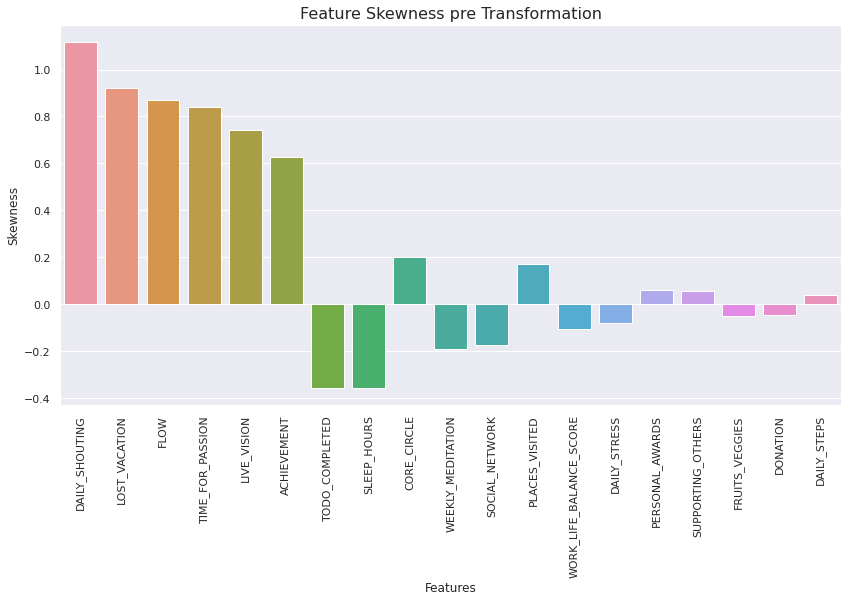

In [14]:
skewness_dict = {}
for _i in coded_df.columns:
  if coded_df[_i].dtypes == 'int64' or coded_df[_i].dtypes == 'float64':
    skewness_dict[_i] = coded_df[_i].skew()
  else:
    None

# sort based on highest absolute skew
skewness = sorted(skewness_dict.items(), key=lambda kv: abs(kv[1]), reverse = True)

# visualize skewness
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})
xval = [_i[0] for _i in skewness]
yval = [_i[1] for _i in skewness]

skewness_plot = sns.barplot(x=xval, y=yval) 
for item in skewness_plot.get_xticklabels():
    item.set_rotation(90)

skewness_plot.set_title("Feature Skewness pre Transformation", fontsize = 16)
skewness_plot.set_xlabel("Features", fontsize = 12)
skewness_plot.set_ylabel("Skewness", fontsize = 12)

In [15]:
from scipy import stats
transformed_skew ={}
parameters_skew = {}
for y in xval[0:8]:
   transformed_skew[y+"_T"],parameters=stats.yeojohnson(coded_df[y])
   parameters_skew[y+"_T"] = parameters

transformed_skew_df = pd.DataFrame(transformed_skew)

transformed_skew_df.head()

,DAILY_SHOUTING_T,LOST_VACATION_T,FLOW_T,TIME_FOR_PASSION_T,LIVE_VISION_T,ACHIEVEMENT_T,TODO_COMPLETED_T,SLEEP_HOURS_T
0,1.868211,1.253469,1.979437,0.000000,0.000000,1.388189,7.455288,16.725277
1,1.127045,0.877468,1.263460,1.206387,2.169449,2.646929,6.085727,20.317733
2,1.127045,1.502612,1.263460,2.656967,2.169449,1.867557,2.233087,20.317733
3,1.868211,1.379739,2.257834,1.206387,0.000000,1.388189,3.466884,10.331872
4,0.000000,-0.000000,0.000000,0.735063,0.000000,1.388189,6.085727,16.725277


Text(0, 0.5, 'Skewness')

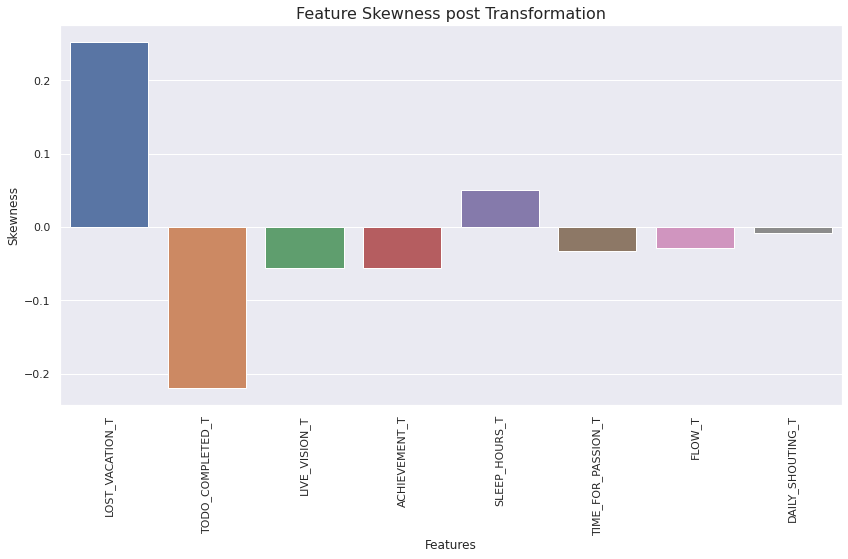

In [16]:
skewness_dict_T = {}
for _i in transformed_skew_df.columns:
  skewness_dict_T[_i] = transformed_skew_df[_i].skew()

# sort based on highest absolute skew
skewness_T = sorted(skewness_dict_T.items(), key=lambda kv: abs(kv[1]), reverse = True)

sns.set(rc={'figure.figsize':(14,7)})
xvalT = [_i[0] for _i in skewness_T]
yvalT = [_i[1] for _i in skewness_T]

skewness_plot_T = sns.barplot(x=xvalT, y=yvalT) 
for item in skewness_plot_T.get_xticklabels():
    item.set_rotation(90)

skewness_plot_T.set_title("Feature Skewness post Transformation", fontsize = 16)
skewness_plot_T.set_xlabel("Features", fontsize = 12)
skewness_plot_T.set_ylabel("Skewness", fontsize = 12)

In [17]:
# transformed dataset and non transformed dataset
# non transformed dataset
coded_df.head()
# transformed dataset
coded_df_T = pd.concat((coded_df.drop(columns=[_i for _i in xval[0:8]]),transformed_skew_df), axis = 1)
coded_df_T.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,DONATION,DAILY_STEPS,PERSONAL_AWARDS,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE,Male,1. 21 to 35,2. 36 to 50,3. 51 or more,BMI >= 25,INCOME SUFFICIENT,DAILY_SHOUTING_T,LOST_VACATION_T,FLOW_T,TIME_FOR_PASSION_T,LIVE_VISION_T,ACHIEVEMENT_T,TODO_COMPLETED_T,SLEEP_HOURS_T
0,3,2.0,2,5,0,5,0,5,4,5,609.5,0,0,1,0,0,0,1.868211,1.253469,1.979437,0.000000,0.000000,1.388189,7.455288,16.725277
1,2,3.0,4,3,8,10,2,5,3,6,655.6,0,0,1,0,1,1,1.127045,0.877468,1.263460,1.206387,2.169449,2.646929,6.085727,20.317733
2,2,3.0,3,4,4,10,2,4,4,3,631.6,0,0,1,0,1,1,1.127045,1.502612,1.263460,2.656967,2.169449,1.867557,2.233087,20.317733
3,3,3.0,10,3,10,7,5,5,5,0,622.7,0,0,0,1,1,0,1.868211,1.379739,2.257834,1.206387,0.000000,1.388189,3.466884,10.331872
4,5,1.0,3,3,10,4,4,5,8,5,663.9,0,0,0,1,1,1,0.000000,-0.000000,0.000000,0.735063,0.000000,1.388189,6.085727,16.725277


UDF for Re-Converting Transformed YeoJohnson Values

In [18]:
# UDF to Invert YeoJohnson as taken from https://gist.github.com/mesgarpour/f24769cd186e2db853957b10ff6b7a95

#!/usr/bin/env python
# -*- coding: UTF-8 -*-
import warnings
import numpy as np
import pandas as pd
import sys

__author__ = "Mohsen Mesgarpour"
__copyright__ = "Copyright 2016, https://github.com/mesgarpour"
__credits__ = ["Mohsen Mesgarpour"]
__license__ = "GPL"
__version__ = "1.0"
__maintainer__ = "Mohsen Mesgarpour"
__email__ = "mohsen.mesgarpour@gmail.com"


class YeoJohnson:
    """
    Computing Yeo-Johnson transofrmation, which is an extension of Box-Cox transformation
    but can handle both positive and negative values.
    References:
    Weisberg, S. (2001). Yeo-Johnson Power Transformations.
    Department of Applied Statistics, University of Minnesota. Retrieved June, 1, 2003.
    https://www.stat.umn.edu/arc/yjpower.pdf
    Adapted from CRAN - Package VGAM
    """
    def fit(self, y, lmbda, derivative=0, epsilon=np.finfo(np.float).eps, inverse=False):
        """
        :param y: The variable to be transformed (numeric array).
        :param lmbda: The function's Lambda value (numeric value or array).
        :param derivative: The derivative with respect to lambda
        (non-negative integer; default: ordinary function evaluation).
        :param epsilon: The lambda's tolerance (positive value).
        :param inverse: The inverse transformation option (logical value).
        :return: The Yeo-Johnson transformation or its inverse, or its derivatives with respect to lambda, of y.
        """
        # Validate arguments
        self.__validate(y, lmbda, derivative, epsilon, inverse)

        # initialise
        y = np.array(y, dtype=float)
        result = y
        if not (isinstance(lmbda, list) or isinstance(lmbda, np.ndarray)):
            lmbda, y = np.broadcast_arrays(lmbda, y)
            lmbda = np.array(lmbda, dtype=float)
        l0 = np.abs(lmbda) > epsilon
        l2 = np.abs(lmbda - 2) > epsilon

        # Inverse
        with warnings.catch_warnings():  # suppress warnings
            warnings.simplefilter("ignore")
            if inverse is True:
                mask = np.where(((y >= 0) & l0) == True)
                result[mask] = np.power(np.multiply(y[mask], lmbda[mask]) + 1, 1 / lmbda[mask]) - 1

                mask = np.where(((y >= 0) & ~l0) == True)
                result[mask] = np.expm1(y[mask])

                mask = np.where(((y < 0) & l2) == True)
                result[mask] = 1 - np.power(np.multiply(-(2 - lmbda[mask]), y[mask]) + 1, 1 / (2 - lmbda[mask]))

                mask = np.where(((y < 0) & ~l2) == True)
                result[mask] = -np.expm1(-y[mask])

            # Derivative
            else:
                if derivative == 0:
                    mask = np.where(((y >= 0) & l0) == True)
                    result[mask] = np.divide(np.power(y[mask] + 1, lmbda[mask]) - 1, lmbda[mask])

                    mask = np.where(((y >= 0) & ~l0) == True)
                    result[mask] = np.log1p(y[mask])

                    mask = np.where(((y < 0) & l2) == True)
                    result[mask] = np.divide(-(np.power(-y[mask] + 1, 2 - lmbda[mask]) - 1), 2 - lmbda[mask])

                    mask = np.where(((y < 0) & ~l2) == True)
                    result[mask] = -np.log1p(-y[mask])

                # Not Derivative
                else:
                    p = self.fit(y, lmbda, derivative=derivative - 1, epsilon=epsilon, inverse=inverse)

                    mask = np.where(((y >= 0) & l0) == True)
                    result[mask] = np.divide(np.multiply(np.power(y[mask] + 1, lmbda[mask]),
                                                         np.power(np.log1p(y[mask]), derivative)) -
                                             np.multiply(derivative, p[mask]), lmbda[mask])

                    mask = np.where(((y >= 0) & ~l0) == True)
                    result[mask] = np.divide(np.power(np.log1p(y[mask]), derivative + 1), derivative + 1)

                    mask = np.where(((y < 0) & l2) == True)
                    result[mask] = np.divide(-(np.multiply(np.power(-y[mask] + 1, 2 - lmbda[mask]),
                                                                    np.power(-np.log1p(-y[mask]), derivative)) -
                                                        np.multiply(derivative, p[mask])), 2 - lmbda[mask])

                    mask = np.where(((y < 0) & ~l2) == True)
                    result[mask] = np.divide(np.power(-np.log1p(-y[mask]), derivative + 1), derivative + 1)

        return result

    @staticmethod
    def __validate(y, lmbda, derivative, epsilon, inverse):
        try:
            if not isinstance(y, (list, np.ndarray, pd.Series)):
                raise Exception("Argument 'y' must be a list!")
            if not isinstance(lmbda, (int, float, np.int, np.float)):
                if not isinstance(lmbda, (list, np.ndarray, pd.Series)) or len(lmbda) != len(y):
                    raise Exception("Argument 'lmbda' must be a number "
                                    "or a list, which its length matches 'y' argument!")
            if not isinstance(derivative, (int, float, np.int, np.float)) or derivative < 0:
                raise Exception("Argument 'derivative' must be a non-negative integer!")
            if not isinstance(epsilon, (int, float, np.int, np.float)) or epsilon <= 0:
                raise Exception("Argument 'epsilon' must be a positive number!")
            if not isinstance(inverse, bool):
                raise Exception("Argument 'inverse' must be boolean!")
            if inverse is True and derivative != 0:
                raise Exception("Argument 'derivative' must be zero "
                                "when argument 'inverse' is 'True'!")
        except ():
            sys.exit()

In [19]:
# example of the use cases for YJ back transform

YJ = YeoJohnson()
DAILY_SHOUTING_T = pd.DataFrame(YJ.fit(y=transformed_skew_df["DAILY_SHOUTING_T"],lmbda=parameters_skew["DAILY_SHOUTING_T"],inverse=True)).rename(columns={0:'DAILY_SHOUTING_INV_YJ'})
pd.concat((DAILY_SHOUTING_T.round(decimals = 0).astype(int),transformed_skew_df["DAILY_SHOUTING_T"],df["DAILY_SHOUTING"]), axis =1)

,DAILY_SHOUTING_INV_YJ,DAILY_SHOUTING_T,DAILY_SHOUTING
0,5,1.868211,5
1,2,1.127045,2
2,2,1.127045,2
3,5,1.868211,5
4,0,0.000000,0
...,...,...,...
15967,1,0.704394,1
15968,0,0.000000,0
15969,1,0.704394,1
15970,2,1.127045,2


#Multicollinearity Check

In [20]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# calculate VIF
coded_df_vif_init = calc_vif(coded_df.drop(columns = ["WORK_LIFE_BALANCE_SCORE"]))
coded_df_T_vif_init = calc_vif(coded_df_T.drop(columns = ["WORK_LIFE_BALANCE_SCORE"]))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
coded_df_vif_init.sort_values(by='VIF', ascending = False).head(12)

,variables,VIF
12,SLEEP_HOURS,18.443477
8,TODO_COMPLETED,7.650661
5,SOCIAL_NETWORK,6.847490
0,FRUITS_VEGGIES,6.296170
17,WEEKLY_MEDITATION,6.270352
4,SUPPORTING_OTHERS,6.177855
3,CORE_CIRCLE,6.139453
15,PERSONAL_AWARDS,5.928235
1,DAILY_STRESS,5.688256
10,DAILY_STEPS,5.650755


In [22]:
coded_df_T_vif_init.sort_values(by='VIF', ascending = False).head(12)

,variables,VIF
23,SLEEP_HOURS_T,12.851278
21,ACHIEVEMENT_T,7.200257
18,FLOW_T,6.944639
22,TODO_COMPLETED_T,6.883428
5,SOCIAL_NETWORK,6.863150
0,FRUITS_VEGGIES,6.275075
9,WEEKLY_MEDITATION,6.230185
19,TIME_FOR_PASSION_T,6.212786
4,SUPPORTING_OTHERS,6.169778
3,CORE_CIRCLE,6.134907


In [24]:
# dropping high VIF variables one by one
# calculate VIF
coded_df_vif_iter2 = calc_vif(coded_df.drop(columns = ["WORK_LIFE_BALANCE_SCORE","SLEEP_HOURS","TODO_COMPLETED","SOCIAL_NETWORK","FRUITS_VEGGIES",
                                                       "SUPPORTING_OTHERS","PERSONAL_AWARDS","WEEKLY_MEDITATION"]))
coded_df_T_vif_iter2 = calc_vif(coded_df_T.drop(columns = ["WORK_LIFE_BALANCE_SCORE","SLEEP_HOURS_T","ACHIEVEMENT_T","SOCIAL_NETWORK","FRUITS_VEGGIES",
                                                           "FLOW_T","TODO_COMPLETED_T","SUPPORTING_OTHERS","WEEKLY_MEDITATION"]))

coded_df_vif_iter2.sort_values(by='VIF', ascending = False).head(12)

,variables,VIF
2,CORE_CIRCLE,5.409693
0,DAILY_STRESS,5.069693
6,DAILY_STEPS,4.975322
3,ACHIEVEMENT,4.321091
1,PLACES_VISITED,4.141184
5,FLOW,4.063966
16,INCOME SUFFICIENT,3.841962
4,DONATION,3.784290
10,TIME_FOR_PASSION,3.576482
12,1. 21 to 35,3.387262


In [25]:
coded_df_T_vif_iter2.sort_values(by='VIF', ascending = False).head(12)

,variables,VIF
2,CORE_CIRCLE,5.459277
5,PERSONAL_AWARDS,5.438476
0,DAILY_STRESS,5.266909
4,DAILY_STEPS,5.001156
14,TIME_FOR_PASSION_T,4.881437
1,PLACES_VISITED,4.216588
15,LIVE_VISION_T,4.173097
11,INCOME SUFFICIENT,3.890468
12,DAILY_SHOUTING_T,3.868363
3,DONATION,3.841409


Text(0, 0.5, 'VIF Score')

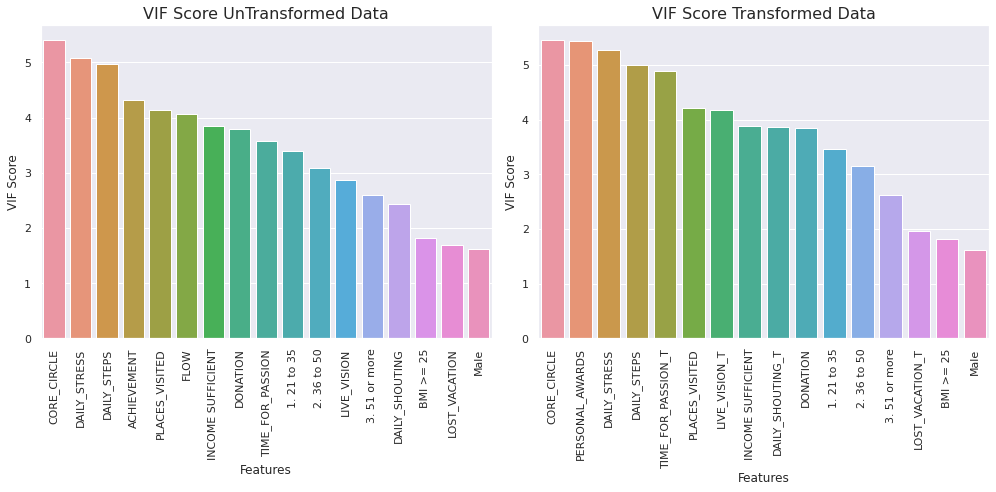

In [26]:
#coded_df_T_vif_iter2.sort_values(by='VIF', ascending = False).head(12)

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [14, 7]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
# UnTransformed Data
VIF_plot = sns.barplot(x=coded_df_vif_iter2.sort_values(by='VIF', ascending = False)["variables"],
                       y=coded_df_vif_iter2.sort_values(by='VIF', ascending = False)["VIF"], ax=axes[0]) 
for item in VIF_plot.get_xticklabels():
    item.set_rotation(90)
VIF_plot.set_title("VIF Score UnTransformed Data", fontsize = 16)
VIF_plot.set_xlabel("Features", fontsize = 12)
VIF_plot.set_ylabel("VIF Score", fontsize = 12)    

# Transformed Data
VIF_plot = sns.barplot(x=coded_df_T_vif_iter2.sort_values(by='VIF', ascending = False)["variables"],
                       y=coded_df_T_vif_iter2.sort_values(by='VIF', ascending = False)["VIF"], ax=axes[1]) 
for item in VIF_plot.get_xticklabels():
    item.set_rotation(90)
VIF_plot.set_title("VIF Score Transformed Data", fontsize = 16)
VIF_plot.set_xlabel("Features", fontsize = 12)
VIF_plot.set_ylabel("VIF Score", fontsize = 12)    

# MultiLinear Regression

In [27]:
# define dependent and independent variables
# un-transformed dataset
xi = coded_df[[_i for _i in coded_df_vif_iter2.variables]]
yi = coded_df.WORK_LIFE_BALANCE_SCORE

# transformed dataset
xt = coded_df_T[[_i for _i in coded_df_T_vif_iter2.variables]]
yt = coded_df_T.WORK_LIFE_BALANCE_SCORE

In [28]:
# coded_df_vif_iter2.variables
xt.head()

,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,DONATION,DAILY_STEPS,PERSONAL_AWARDS,Male,1. 21 to 35,2. 36 to 50,3. 51 or more,BMI >= 25,INCOME SUFFICIENT,DAILY_SHOUTING_T,LOST_VACATION_T,TIME_FOR_PASSION_T,LIVE_VISION_T
0,2.0,2,5,0,5,4,0,0,1,0,0,0,1.868211,1.253469,0.000000,0.000000
1,3.0,4,3,2,5,3,0,0,1,0,1,1,1.127045,0.877468,1.206387,2.169449
2,3.0,3,4,2,4,4,0,0,1,0,1,1,1.127045,1.502612,2.656967,2.169449
3,3.0,10,3,5,5,5,0,0,0,1,1,0,1.868211,1.379739,1.206387,0.000000
4,1.0,3,3,4,5,8,0,0,0,1,1,1,0.000000,-0.000000,0.735063,0.000000


In [29]:
xt.columns

Index(['DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'DONATION',
       'DAILY_STEPS', 'PERSONAL_AWARDS', 'Male', '1. 21 to 35', '2. 36 to 50',
       '3. 51 or more', 'BMI >= 25', 'INCOME SUFFICIENT', 'DAILY_SHOUTING_T',
       'LOST_VACATION_T', 'TIME_FOR_PASSION_T', 'LIVE_VISION_T'],
      dtype='object')

In [30]:
# import sklearn and standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# non dummy cols
xi_nondummy = ['DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'ACHIEVEMENT',
       'DONATION', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'LOST_VACATION',
       'DAILY_SHOUTING', 'TIME_FOR_PASSION']
xt_nondummy = ['DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'DONATION',
       'DAILY_STEPS', 'PERSONAL_AWARDS','DAILY_SHOUTING_T',
       'LOST_VACATION_T', 'TIME_FOR_PASSION_T', 'LIVE_VISION_T']
# transform dataframe except the dummy variables

xi_transformed = pd.DataFrame(sc.fit_transform(xi[xi_nondummy]),
       columns = xi_nondummy)
Xi = pd.concat([xi_transformed, xi[['Male', '1. 21 to 35',
       '2. 36 to 50', '3. 51 or more', 'BMI >= 25', 'INCOME SUFFICIENT']]],axis=1)

xt_transformed = pd.DataFrame(sc.fit_transform(xt[xt_nondummy]),
       columns = xt_nondummy)
Xt = pd.concat([xt_transformed, xt[['Male', '1. 21 to 35',
       '2. 36 to 50', '3. 51 or more', 'BMI >= 25', 'INCOME SUFFICIENT']]],axis=1)

In [31]:
Xi.head()

,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,ACHIEVEMENT,DONATION,FLOW,DAILY_STEPS,LIVE_VISION,LOST_VACATION,DAILY_SHOUTING,TIME_FOR_PASSION,Male,1. 21 to 35,2. 36 to 50,3. 51 or more,BMI >= 25,INCOME SUFFICIENT
0,-0.578847,-0.976195,-0.178885,-0.726028,-1.466526,0.341566,-0.243385,-1.161331,0.569089,0.773151,-1.218878,0,0,1,0,0,0
1,0.152299,-0.372295,-0.883050,0.362605,-0.386337,-0.506811,-0.243385,0.386232,-0.243464,-0.347834,-0.486065,0,0,1,0,1,1
2,0.152299,-0.674245,-0.530967,-0.363150,-0.386337,-0.506811,-0.589295,0.386232,1.923345,-0.347834,1.712376,0,0,1,0,1,1
3,0.152299,1.439404,-0.883050,-0.726028,1.233946,0.765754,-0.243385,-1.161331,1.110792,0.773151,-0.486065,0,0,0,1,1,0
4,-1.309993,-0.674245,-0.883050,-0.726028,0.693851,-1.355188,-0.243385,-1.161331,-0.785167,-1.095157,-0.852472,0,0,0,1,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cb13e55d0>,
      dtype=object)

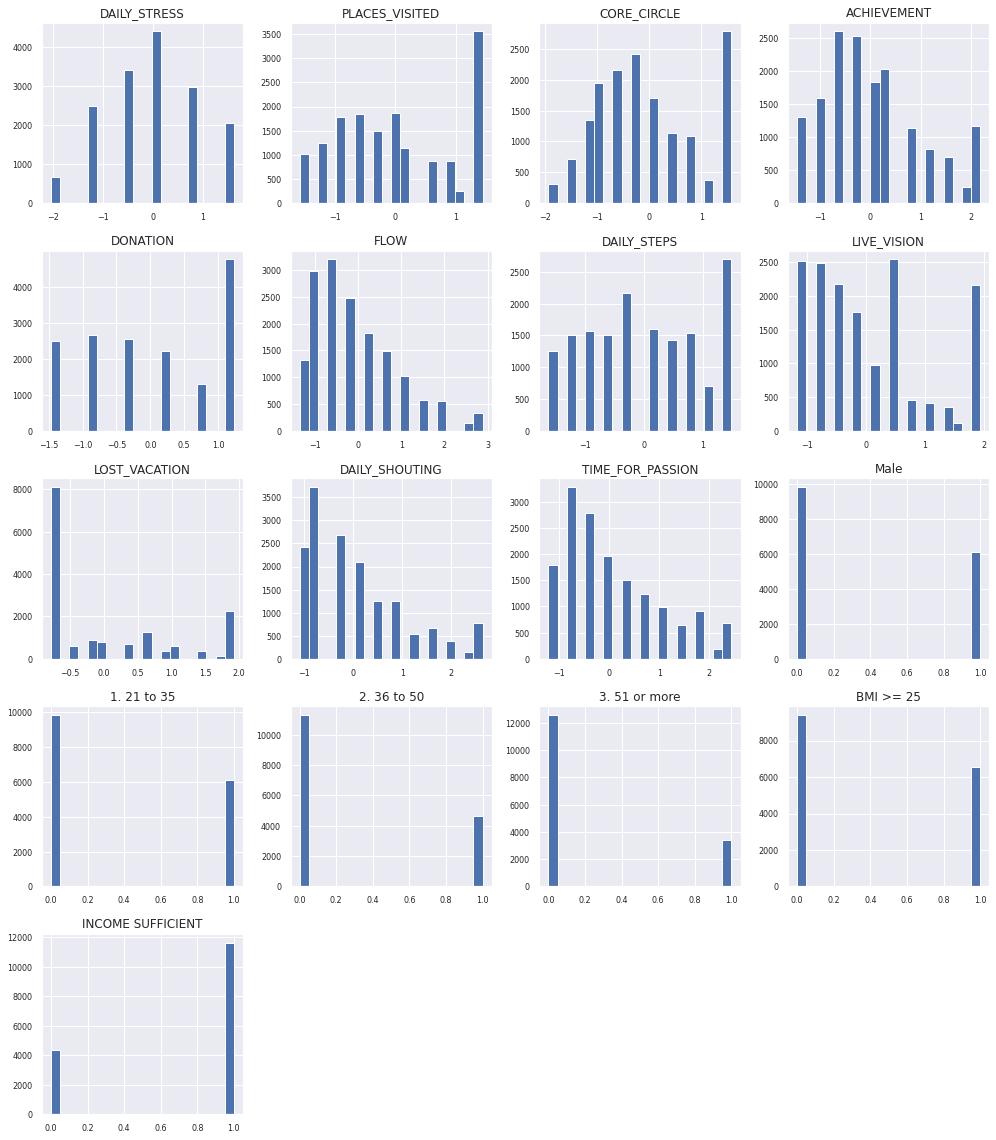

In [32]:
# assumption check 1: linear distribution?
Xi.hist(figsize=(14,16), bins = 20, xlabelsize=8, ylabelsize = 8)

## Model Evaluation: R Squared & Adjusted R Squared

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xi, yi,random_state = 0,test_size=0.2)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

Text(0.5, 1.0, 'Model Trained R Adj Squared =0.921')

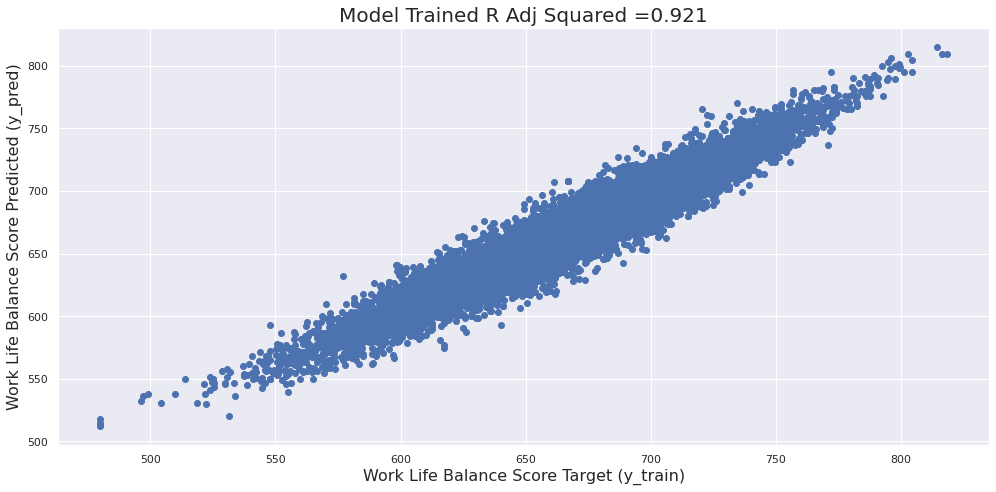

In [34]:
xi_r_sqr = regr.score(X_train,y_train) 
from matplotlib import pyplot as plt
plt.scatter(y_train, y_pred)
plt.xlabel('Work Life Balance Score Target (y_train)', size = 16)
plt.ylabel('Work Life Balance Score Predicted (y_pred)', size = 16)

adj_r2 = (1 - (1 - xi_r_sqr) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))

plt.title('Model Trained R Adj Squared ='+ '{number:.3f}'.format(number=adj_r2), size = 20)


In [35]:
xi_r_sqr, adj_r2

(0.9215596834322168, 0.9214551701175643)

In [36]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.176018575695859e-13


## Heteroscedascity Check

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


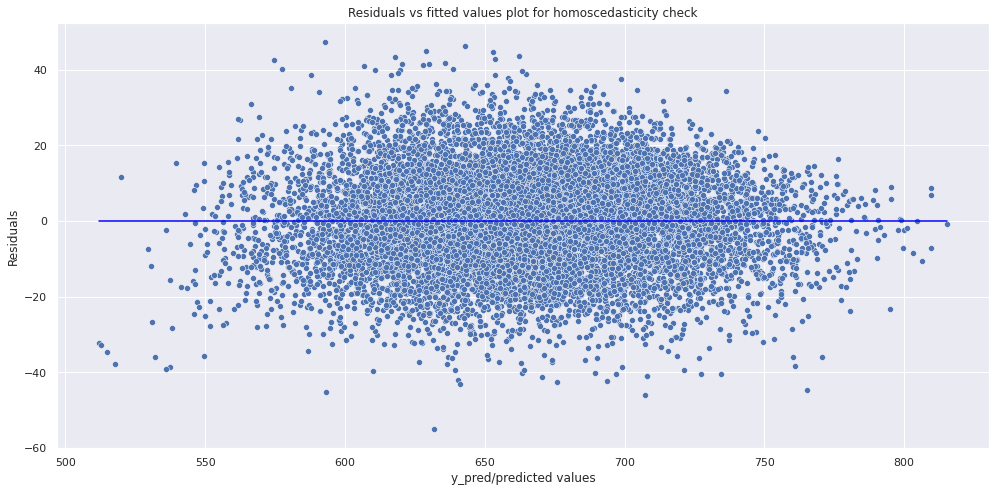

In [38]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Checking heteroscedasticity quantitiavely can be done using Goldfeld Quandt

Null Hypothesis: Error terms are homoscedastic
Alternative Hypothesis: Error terms are heteroscedastic.

In [39]:
# Goldfield Quant test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

# p-value > 0.05 means fail to reject H0 meaning error terms are homoscedastic or there's no significant variance observed in the error terms

[('F statistic', 0.9603175979087015), ('p-value', 0.9469440147522195)]

## Residual Normality Check

Check for Normality in Residuals

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


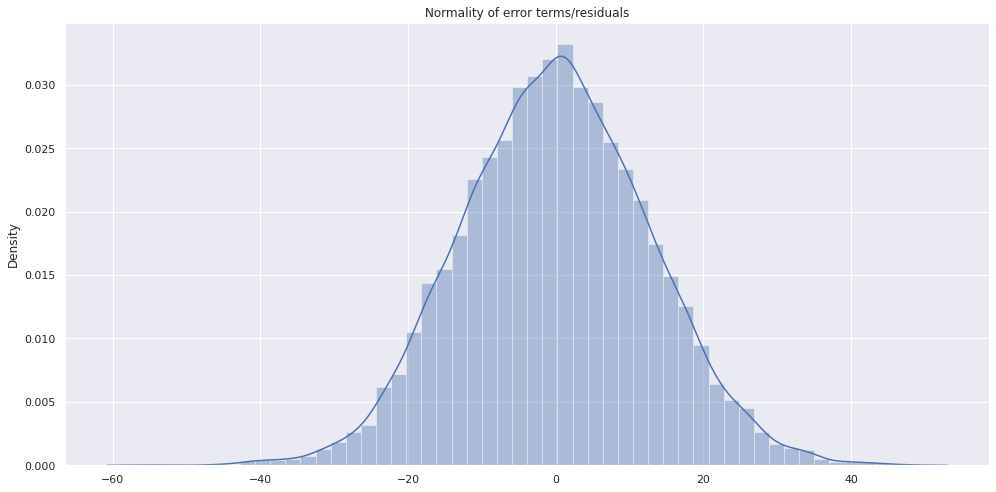

In [40]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

## Training Feature Weights

In [76]:
reg_summary = pd.DataFrame(Xi.columns.values, columns = ["Features"])
reg_summary["Weights"] = regr.coef_
xi_intercept = [['Intercept', regr.intercept_]]
reg_summary = pd.concat([pd.DataFrame(xi_intercept, columns = ['Features', 'Weights']), reg_summary])

reg_summary


,Features,Weights
0,Intercept,657.897472
0,DAILY_STRESS,-4.978206
1,PLACES_VISITED,8.767266
2,CORE_CIRCLE,7.558308
3,ACHIEVEMENT,8.155056
4,DONATION,9.184095
5,FLOW,5.676442
6,DAILY_STEPS,8.149554
7,LIVE_VISION,6.835509
8,LOST_VACATION,-6.691810


## Apply Model to Test Dataset

In [42]:
y_hat_test = regr.predict(X_test)

Text(0.5, 1.0, 'Model Trained R Squared =0.920')

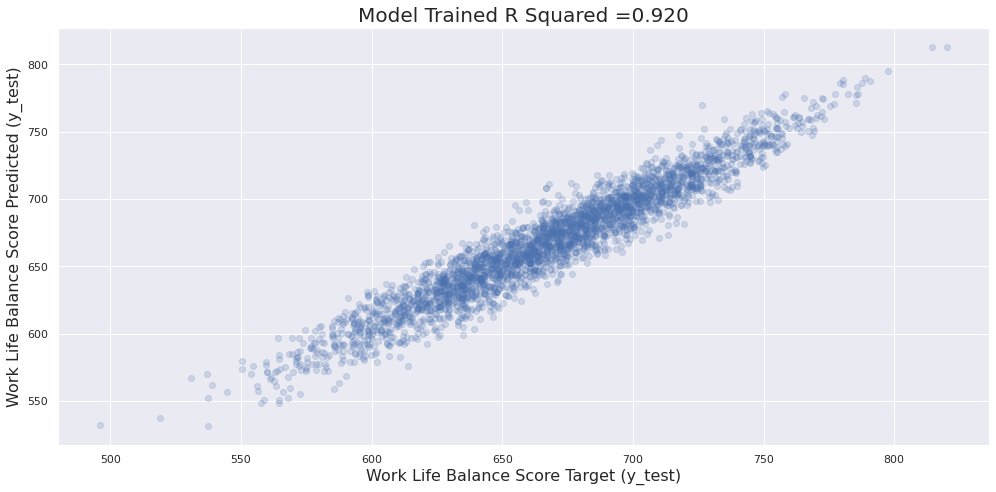

In [43]:
xi_r_sqr_test = regr.score(X_test,y_test) 
from matplotlib import pyplot as plt
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.xlabel('Work Life Balance Score Target (y_test)', size = 16)
plt.ylabel('Work Life Balance Score Predicted (y_test)', size = 16)

plt.title('Model Trained R Squared ='+ '{number:.3f}'.format(number=xi_r_sqr_test), size = 20)


In [44]:
df_pf = pd.DataFrame(y_hat_test, columns = ['Predicted'])
y_test = y_test.reset_index (drop = True)
df_pf["Target"] = y_test
df_pf["Residual"] = df_pf["Target"] - df_pf["Predicted"]
df_pf["Residual%"] = abs((df_pf["Target"] - df_pf["Predicted"])/df_pf["Target"]*100)
df_pf.describe()

,Predicted,Target,Residual,Residual%
count,3195.000000,3195.000000,3195.000000,3195.000000
mean,668.550564,668.388169,-0.162395,1.508982
std,42.757189,44.562575,12.621878,1.186381
min,531.209830,496.100000,-43.106119,0.001642
25%,638.953639,636.900000,-8.489785,0.566392
50%,668.491479,668.800000,-0.189159,1.248033
75%,698.541907,699.800000,8.233869,2.170593
max,813.173269,820.200000,40.322640,7.279183


## Testing Feature Weights

Text(0.5, 1.0, 'Feature Weights in Linear Regression (Test)')

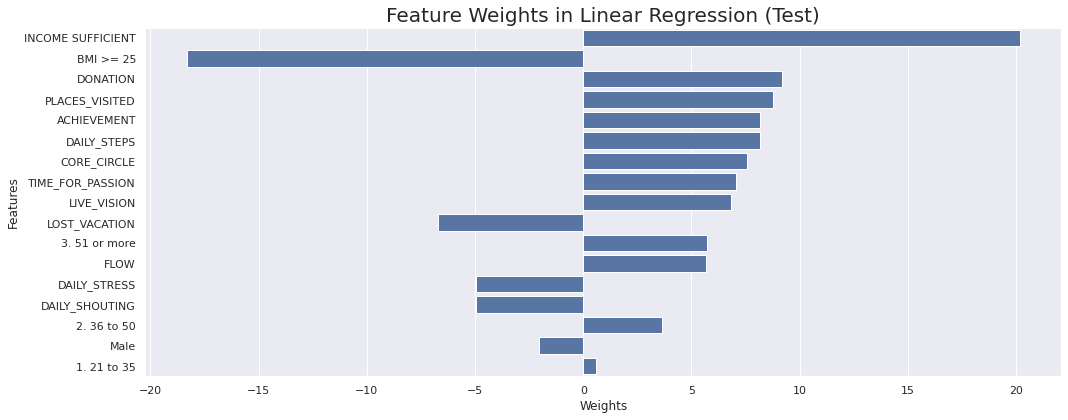

In [78]:
reg_summary = pd.DataFrame(Xi.columns.values, columns = ["Features"])
reg_summary["Weights"] = regr.coef_

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="Weights", y="Features", data=reg_summary.sort_values("Weights", ascending=False, key = abs),
            label="Weights", color="b")
ax.set_title("Feature Weights in Linear Regression (Test)",fontsize=20)            


In [45]:
df_pf.sort_values(by=["Residual%"]).tail(20)

,Predicted,Target,Residual,Residual%
1790,691.663421,656.4,-35.263421,5.372246
1806,631.251209,598.4,-32.851209,5.489841
848,670.683708,709.8,39.116292,5.510889
128,603.730776,639.0,35.269224,5.519440
2868,665.008721,629.7,-35.308721,5.607229
2955,673.277360,713.6,40.322640,5.650594
2064,598.700413,634.8,36.099587,5.686765
1645,596.956486,564.3,-32.656486,5.787079
1592,697.766715,659.2,-38.566715,5.850533
1296,769.606119,726.5,-43.106119,5.933396


In [ ]:
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

# Repeat the same process for transformed variables as needed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ca8e08f50>,
      dtype=object)

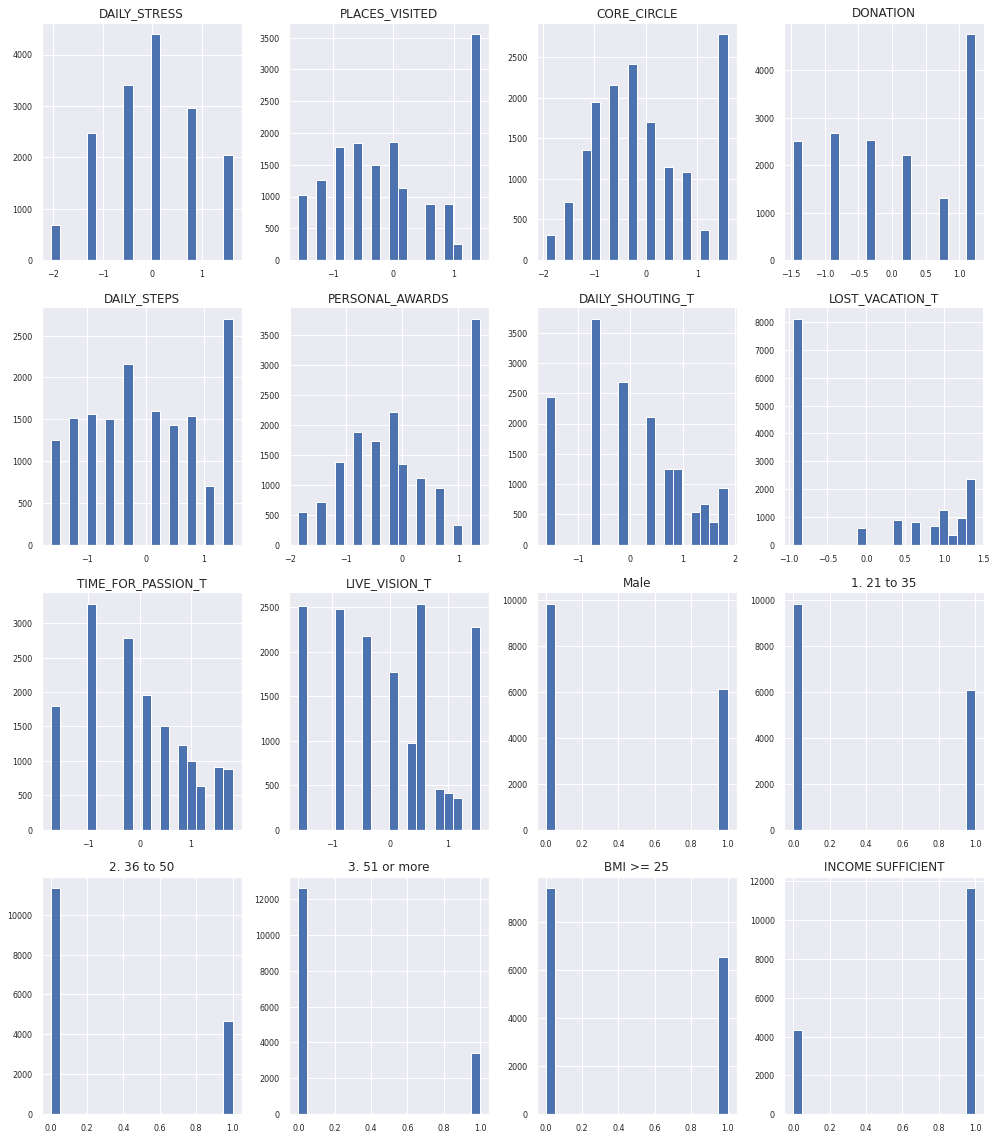

In [79]:
# assumption check 1: linear distribution?
Xt.hist(figsize=(14,16), bins = 20, xlabelsize=8, ylabelsize = 8)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xt, yt,random_state = 0,test_size=0.2)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

Text(0.5, 1.0, 'Model Trained R Adj Squared =0.904')

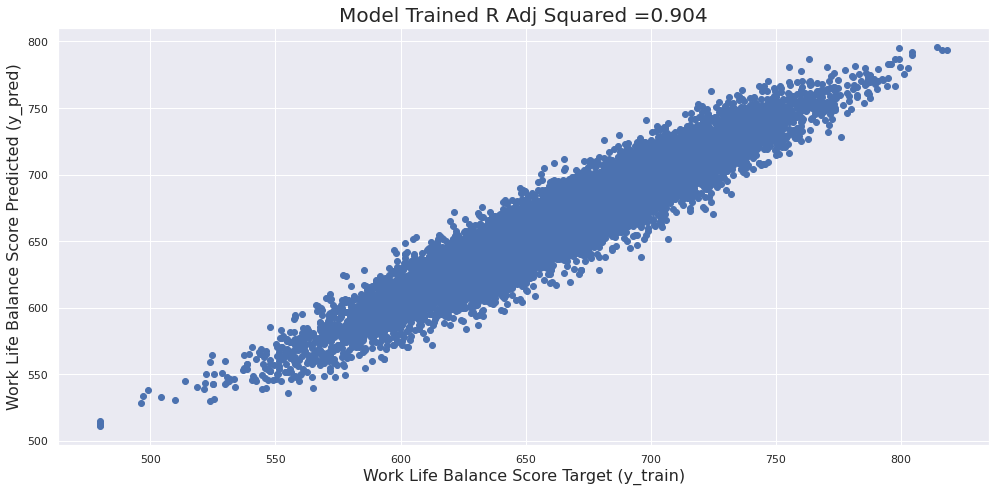

In [81]:
xt_r_sqr = regr.score(X_train,y_train) 
from matplotlib import pyplot as plt
plt.scatter(y_train, y_pred)
plt.xlabel('Work Life Balance Score Target (y_train)', size = 16)
plt.ylabel('Work Life Balance Score Predicted (y_pred)', size = 16)

adj_r2 = (1 - (1 - xt_r_sqr) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))

plt.title('Model Trained R Adj Squared ='+ '{number:.3f}'.format(number=adj_r2), size = 20)



In [82]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}'".format(mean_residuals))

Mean of Residuals -8.042696455863562e-14'


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


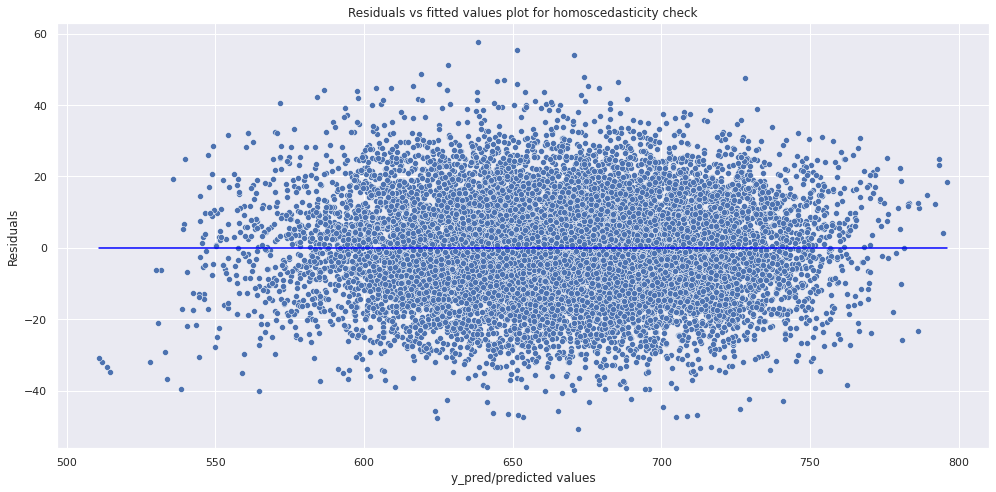

In [83]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [84]:
# Goldfield Quant test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.9848629555297349), ('p-value', 0.7286619962241192)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


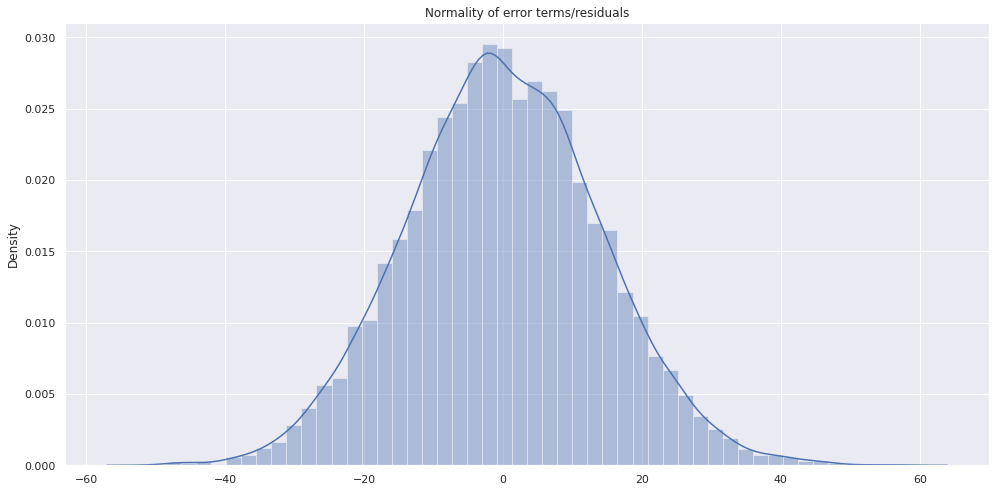

In [85]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [87]:
reg_summary = pd.DataFrame(Xt.columns.values, columns = ["Features"])
reg_summary["Weights"] = regr.coef_
xt_intercept = [['Intercept', regr.intercept_]]
reg_summary = pd.concat([pd.DataFrame(xt_intercept, columns = ['Features', 'Weights']), reg_summary])

reg_summary

,Features,Weights
0,Intercept,660.298010
0,DAILY_STRESS,-5.695121
1,PLACES_VISITED,8.273216
2,CORE_CIRCLE,8.164664
3,DONATION,8.938912
4,DAILY_STEPS,8.519825
5,PERSONAL_AWARDS,8.487033
6,DAILY_SHOUTING_T,-4.526305
7,LOST_VACATION_T,-5.877098
8,TIME_FOR_PASSION_T,10.097915


Testing

In [88]:
y_hat_test = regr.predict(X_test)

Text(0.5, 1.0, 'Model Trained R Squared =0.903')

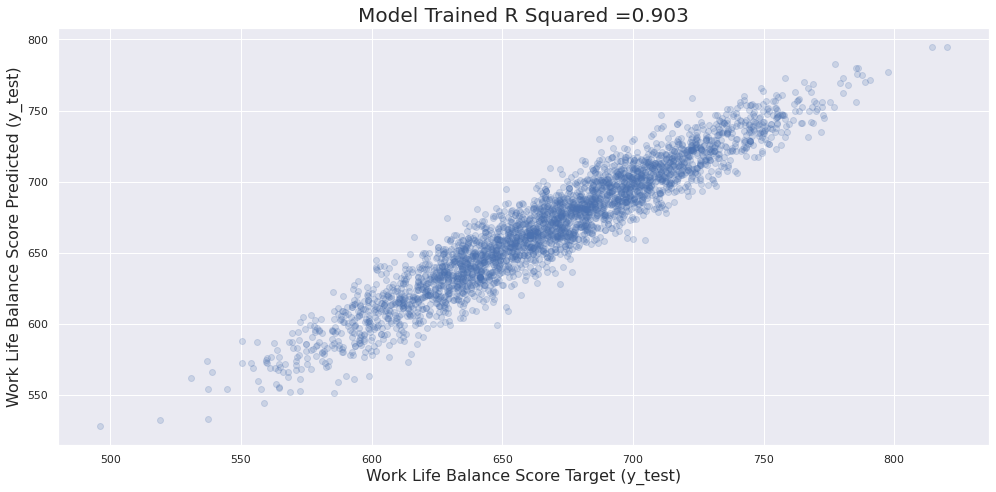

In [89]:
xi_r_sqr_test = regr.score(X_test,y_test) 
from matplotlib import pyplot as plt
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.xlabel('Work Life Balance Score Target (y_test)', size = 16)
plt.ylabel('Work Life Balance Score Predicted (y_test)', size = 16)

plt.title('Model Trained R Squared ='+ '{number:.3f}'.format(number=xi_r_sqr_test), size = 20)


In [90]:
df_pf = pd.DataFrame(y_hat_test, columns = ['Predicted'])
y_test = y_test.reset_index (drop = True)
df_pf["Target"] = y_test
df_pf["Residual"] = df_pf["Target"] - df_pf["Predicted"]
df_pf["Residual%"] = abs((df_pf["Target"] - df_pf["Predicted"])/df_pf["Target"]*100)
df_pf.describe()

,Predicted,Target,Residual,Residual%
count,3195.000000,3195.000000,3195.000000,3195.000000
mean,668.626341,668.388169,-0.238172,1.657457
std,42.511005,44.562575,13.881988,1.296920
min,528.056622,496.100000,-45.757579,0.000180
25%,639.087436,636.900000,-9.325102,0.624107
50%,669.185947,668.800000,-0.301212,1.396690
75%,699.751972,699.800000,9.293852,2.374781
max,794.917382,820.200000,48.875526,7.542519


In [91]:
df_pf.sort_values(by=["Residual%"]).tail(20)

,Predicted,Target,Residual,Residual%
707,611.885523,651.4,39.514477,6.066085
1936,638.656230,601.8,-36.856230,6.124332
2682,709.401634,668.2,-41.201634,6.166063
1561,729.938739,687.2,-42.738739,6.219258
1251,640.815932,603.1,-37.715932,6.253678
2882,680.563152,640.3,-40.263152,6.288170
1728,622.140458,585.1,-37.040458,6.330620
2269,639.934930,601.6,-38.334930,6.372163
805,528.056622,496.1,-31.956622,6.441569
102,659.284057,704.7,45.415943,6.444720


Text(0.5, 1.0, 'Feature Weights in Linear Regression (Test), Transformed Data')

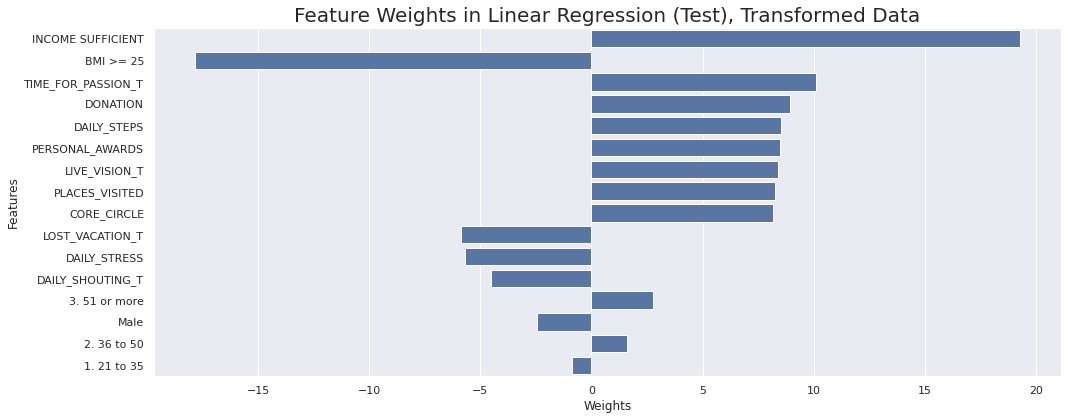

In [93]:
reg_summary = pd.DataFrame(Xt.columns.values, columns = ["Features"])
reg_summary["Weights"] = regr.coef_

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="Weights", y="Features", data=reg_summary.sort_values("Weights", ascending=False, key = abs),
            label="Weights", color="b")
ax.set_title("Feature Weights in Linear Regression (Test), Transformed Data",fontsize=20)            
